In [1]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Loading Data

file_path = "/content/drive/MyDrive/Datasets/embedding-data.txt"

with open(file_path, 'r') as file:
    royal_data = file.readlines()

print(royal_data)


['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only man can be a king\n', 'Only woman can be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [3]:
for i in range(len(royal_data)):
  royal_data[i] = royal_data[i].lower().replace('\n', '')

print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only man can be a king', 'only woman can be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


In [4]:
# # Remove Stop words
# stopwords = ['the', 'is', 'are', 'can', 'will', 'be', 'a', 'only', 'their', 'now', 'and', 'at', 'it']
# filter_data = []

# for sent in royal_data:
#   temp = []
#   for word in sent.split():
#     print(word)

In [5]:
# Remove Stop words
stopwords = ['the', 'is', 'are', 'can', 'will', 'be', 'a', 'only', 'their', 'now', 'and', 'at', 'it']
filter_data = []

for sent in royal_data:
  temp = []
  for word in sent.split():
    if word not in stopwords:
      temp.append(word)
  filter_data.append(temp)
print(filter_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [6]:
# Creating Biagrams
bigrams = []
for words_list in filter_data:
  for i in range(len(words_list)-1):
    for j in range(i+1, len(words_list)):
      bigrams.append([words_list[i], words_list[j]])
      bigrams.append([words_list[j], words_list[i]])
print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


In [7]:
#Vocabulary
all_words = []
for sent in filter_data:
  all_words.extend(sent)

all_words = list(set(all_words))
all_words.sort()
print(all_words)

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']


In [8]:
from collections import Counter
# One-hot encoding
words_dic = {}

counter = 0
for word in all_words:
  words_dic[word] = counter
  counter = counter+1

print(words_dic)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [9]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
  onehot_data[i][i]= 1

print(onehot_data)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
onehot_dict = {}
for i in range(len(all_words)):
  onehot_dict[all_words[i]]= onehot_data[i]

for word in onehot_dict:
  print(word, ":", onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
X = []
Y = []

for bi in bigrams:
  X.append(onehot_dict[bi[0]])
  Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Input

vocab_size = len(onehot_data[0])
embed_size = 2
model = Sequential()
model.add(Input(shape = (vocab_size,)))
model.add(Dense(embed_size, activation = 'linear'))
model.add(Dense(vocab_size, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer='adam')

In [18]:
model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 18ms/step - loss: 2.3273
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 2.3259
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 2.3245
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 2.3231
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 2.3217
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 2.3203
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 2.3189
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 2.3175
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 2.3160
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 2.3146
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 2.3132
Epoch 12/100
1/1 [==============================] - 0s 13ms/step - loss: 2.3118
Epoch 13/100
1/1 [==============================] - 

In [19]:
weight = model.get_weights()[0]

In [20]:
print(weight)

[[ 0.7572754  -0.2065207 ]
 [-0.6627926  -0.7405285 ]
 [ 0.01587155 -0.7545315 ]
 [-0.28940243  0.4041233 ]
 [-0.78370905 -0.8970914 ]
 [-0.37593755  0.6297583 ]
 [-0.3835818   0.11178503]
 [ 0.70429486 -0.84898335]
 [ 0.14338768  0.5087206 ]
 [-0.4986804  -0.53637815]
 [-0.745403    0.07480291]
 [ 0.40746543  0.3577371 ]]


In [21]:
word_embedding = {}
for word in all_words:
  word_embedding[word] = weight[words_dic[word]]
for word in all_words:
  print(word, ":", word_embedding[word])

beautiful : [ 0.7572754 -0.2065207]
boy : [-0.6627926 -0.7405285]
daughter : [ 0.01587155 -0.7545315 ]
future : [-0.28940243  0.4041233 ]
king : [-0.78370905 -0.8970914 ]
man : [-0.37593755  0.6297583 ]
prince : [-0.3835818   0.11178503]
princess : [ 0.70429486 -0.84898335]
queen : [0.14338768 0.5087206 ]
son : [-0.4986804  -0.53637815]
strong : [-0.745403    0.07480291]
woman : [0.40746543 0.3577371 ]


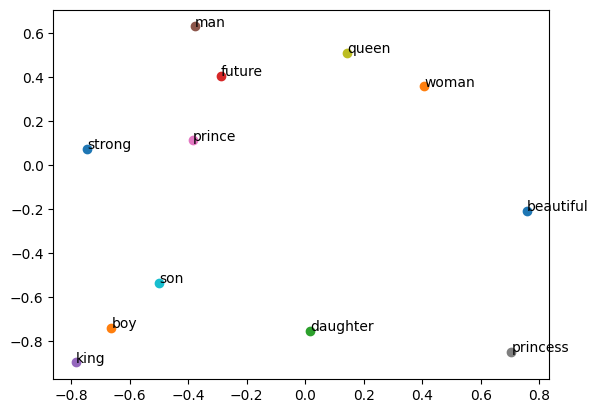

In [22]:
import matplotlib.pyplot as plt

for word in all_words:
  coordinates = word_embedding[word]
  plt.scatter(coordinates[0], coordinates[1])
  plt.annotate(word, (coordinates[0], coordinates[1]))